In [1]:
import deorbit
import matplotlib.pyplot as plt
import deorbit.data_models
from deorbit.utils.dataio import load_sim_data, load_sim_config
from deorbit.utils.plotting import plot_trajectories, plot_height, plot_crash_site_on_map
import numpy as np

This example notebook exists to show some of the basic functionality of the simulator module.

The available numerical methods as well as potential atmospheric models can be investigated. The atmospheric models are further investigated within the atmos_visualization.ipynb file.

In [2]:
print(f"Available sim methods: {list(deorbit.simulator.get_available_sim_methods().keys())}")
print(f"Available atmospheric methods: {list(deorbit.simulator.get_available_atmos_models().keys())}")
#print(f"Available noise types: {list(deorbit.simulator.get_available_noise_types())}")

Available sim methods: ['euler', 'adams_bashforth', 'RK4']
Available atmospheric methods: ['zero_atmos', 'simple_atmos', 'icao_standard_atmos', 'coesa_atmos', 'coesa_atmos_fast']


An instance of a 2D simulator that uses the 'adams_bashforth' numerical integration method and the coesa_atmos_fast atmospheric model can be initialised. The time step, initial conditions and noise types are also editable. The cell tries to load data before running the simulation to save re-running.

In [3]:
save_path = "eg/sim_example_1/" #take care to delete this data file when making changes to initial set up

sim_data = load_sim_data(save_path)
sim_config = load_sim_config(save_path)

#this takes roughly 3 minutes, slowness due to coesa_atmos

if sim_data is None or sim_config is None:
    np.random.seed(0)
    sim = deorbit.simulator.run(
        "adams_bashforth",
        "coesa_atmos",
        initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
        time_step=0.1,
        noise_types = None
    )
    sim_data = sim.gather_data()
    sim_config = sim.export_config()
    sim.save_data(save_path)
else:
    print("Loaded data from file")

Loaded data from file


The trajectory can then be plotted for ease of visualisation.

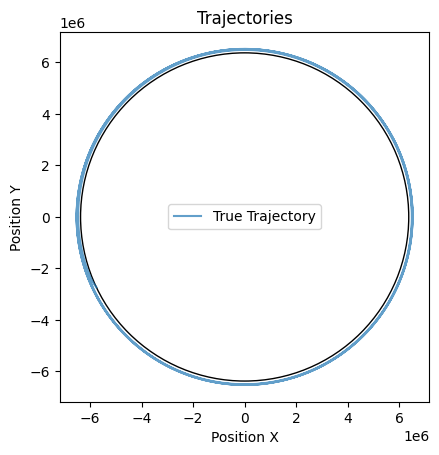

In [4]:
trajectory = sim_data.state_array()[:, :2]
plot_trajectories(trajectory)

Can also plot how the height varies with time.

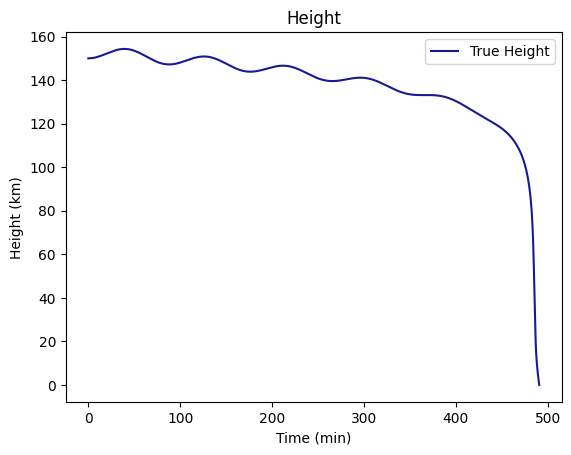

In [5]:
plot_height(trajectory, sim_data.times)

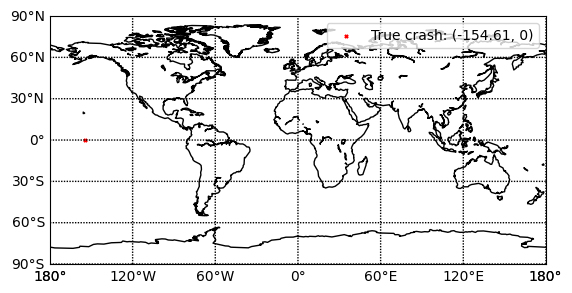

In [6]:
plot_crash_site_on_map(trajectory)